<a href="https://colab.research.google.com/github/j824h/Standalone-DeepLearning/blob/master/Lec2/Assignment1_pytorch_MNIST_MLP_j824h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment1. MNIST Digit Recogntion

이 과제에서는 손으로 쓴 숫자들의 이미지를 input으로 받아서 0~9 중 어느 숫자에 해당하는지를 분류하는 10-way Classification Problem을 풀어 볼 겁니다. 지금까지 실습은 가상의 인공 데이터셋이었다면 이번에는 real-world 데이터셋이니 좀 더 설레지 않나요?

`pytorch` 내에 이미 구현되어 있는 MNIST Dataset을 사용하여 데이터가 공급됩니다.  
대신 여러분들은 Model을 짜고 올바르게 Loss Function을 활용하는 코드를 작성하는데 집중해주시길 바랍니다.  

1. 현재 Linear Model만 구현이 되어 있습니다. MLP Model을 2.Model Architecture 부분에 구현해주세요.
2. MLP Model을 생성할 때 hidden unit 수와 hidden layer 수를 인풋으로 넣어주면 해당 값으로 MLP가 자동으로 생성되게 하는 코드를 구현해보세요.  
3. 다양한 hidden_unit과 hidden_layer 그리고 learning rate를 바꿔가면서 정확도의 변화를 알려주세요(이 때 모델이 고정되었다면 learning rate부터 바꿔가면서 튜닝해보세요. 차트나 표를 자유롭게 활용하여 결과를 보여주세요.  
4. 실험했던 결과 중 Test Set에 대한 Accuracy가 가장 높았던 실험 조건과 그때의 Accuracy를 알려주세요!  
5. 양식은 따로 없으며 이 주피터 노트북의 뒷부분에 추가로 1~4의 내용을 덧붙여서 정리하면 되겠습니다!

**과제 시 도저히 해결할 수 없는 애러나 질문 사항은 제 깃허브의 [Issue](https://github.com/heartcored98/Standalone-DeepLearning/issues)란에 새 이슈를 남겨주세요**

**Due** : 2019-01-23 22:00  
**How to Submit** : 여러분의 깃허브 저장소를 만드신 후 작업한 .ipynb 파일을 올려주신 후 파일의 url 주소를 강의 피드백 설문 중 과제 제출 섹션에 남겨주세요! 그럼 저희가 파일을 하나하나 다운받고 열람할 필요 없이 온라인 상에서 바로 확인하기에 용이합니다 :)


**이 문서를 구글 Colab에서 쉽게 실행해보는법**  
1. [제가 미리 만들어놓은 이 링크](https://colab.research.google.com/github/heartcored98/Standalone-DeepLearning/blob/master/Lec2/Assignment1_pytorch_MNIST_MLP.ipynb)를 눌러 본 .ipynb 파일을 구글 Colab에서 바로 열 수 있습니다. 이때 구글에 로그인을 해야 합니다.
2. 아무 셀이나 선택한 후 `Ctrl+Enter`를 눌러 실행해보면 **[경고: 이 노트는 Google에서 작성하지 않았습니다]**라고 뜨는데 `실행 전에 모든 런타임 재설정`을 선택한 채로 `무시하고 계속하기`를 눌러줍니다.  
3. **[모든 런타임 재설정]** 이 뜰 텐데 `예`를 눌러줍니다.  
4. 잠시 구글 서버의 배치가 되면서 우상단에 `연결중` -> `초기화중` -> `연결됨`이 뜨면서 실행이 가능한 상태가 됩니다.  

**구글 Colab에서 실습후 저장하는법**  
**쉽게 실행보는법**을 따라오셨다면 Colab에서 임시 노트북으로 열리기 때문에 `파일`->`드라이브로 저장`을 눌러서 여러분의 구글 드라이브에 저장하거나 `파일` -> `.ipynb 다운로드`를 눌러서 다운로드 해줍시다.   

*Written by. 조재영(whwodud9@kaist.ac.kr) 2019.01.21 *

### Install Pytorch 1.0 (For Google Colab)

자꾸 tcmalloc 이 뜨지만 설치는 잘 됩니다.

In [0]:
!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)

tcmalloc: large alloc 1073750016 bytes == 0x61830000 @  0x7f220ca892a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
1.0.0


### 1. Data Preparation

**Data Set**  
$$X_{train} \in \mathcal{R}^{50000 \times 784}, Y_{train} \in \mathcal{Z}^{50000}$$  
$$X_{val} \in \mathcal{R}^{10000 \times 784}, Y_{val} \in \mathcal{Z}^{10000}$$  
$$X_{test} \in \mathcal{R}^{10000 \times 784}, Y_{test} \in \mathcal{Z}^{10000}$$

In [0]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn


batch_size = 128
train_dataset = datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
test_dataset =  datasets.MNIST('./data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])
print(len(train_dataset), len(val_dataset), len(test_dataset))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

50000 10000 10000


### Inspecting Dataset

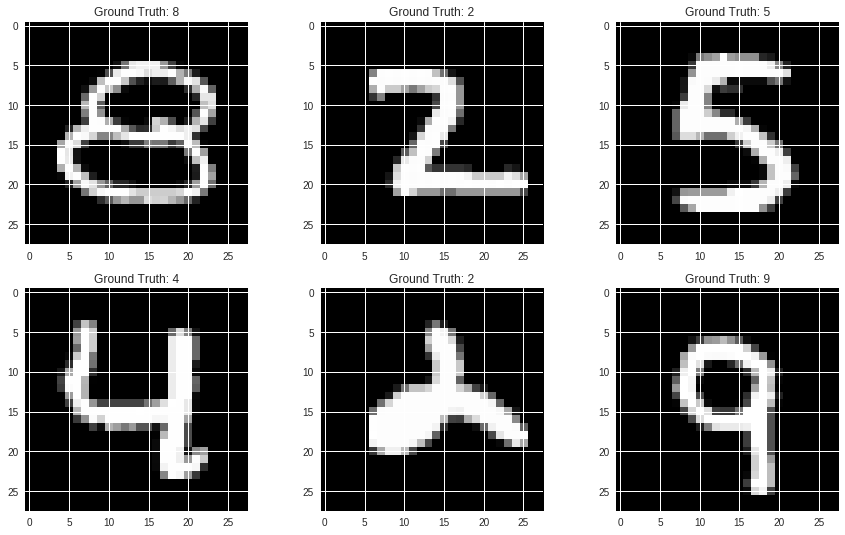

In [0]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))
plt.tight_layout()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))

### 2. Model Architecture

In [0]:
class LinearModel(nn.Module):
    def __init__(self): 
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=784, out_features=10, bias=True)
    
    def forward(self, x):
        x = self.linear(x)
        return x

class MyModel(nn.Module):
    def __init__(self, hidden_nodes): 
        super().__init__()
        nodes = (784,) + hidden_nodes + (10,)
        depth = len(nodes)
        linears = [nn.Linear(nodes[i], nodes[i+1]) for i in range(depth-1)]
        self.linears = nn.ModuleList(linears)
        self.relu = nn.ReLU()
        self.depth = depth
    
    def forward(self, x):
        for linear in self.linears:
            x = linear(x)
            x = self.relu(x)
        return x

### 3. Cost Function Define (Loss Function Define)  

In [0]:
cls_loss = nn.CrossEntropyLoss()

### 4. Train & Evaluation

HIdden layer는 일단 1개를 넣었는데요.
느낌상 10-784 사이의 숫자가 맞지 않을까 해서 100으로 해 봤어요.
Learning rate는 주신 값 그대로 해 봤습니다.

In [132]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# ====== Construct Model ====== #
model = MyModel((100,))
print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# ===== Construct Optimizer ====== #
lr = 0.005 
optimizer = optim.SGD(model.parameters(), lr=lr) 

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 30
for i in range(epoch):
    
    # ====== Train ====== #
    train_loss = 0
    model.train() 
    optimizer.zero_grad() 
    
    for input_X, true_y in train_loader:
        input_X = input_X.squeeze()
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X)

        loss = cls_loss(pred_y.squeeze(), true_y)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.detach().numpy()
    train_loss = train_loss / len(train_loader)
    list_train_loss.append(train_loss)
    list_epoch.append(i)
    
    
    # ====== Validation ====== #
    val_loss = 0
    model.eval()
    optimizer.zero_grad()
    
    for input_X, true_y in val_loader:
        input_X = input_X.squeeze()
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X)

        loss = cls_loss(pred_y.squeeze(), true_y)
        val_loss += loss.detach().numpy()
    val_loss = val_loss / len(val_loader)
    list_val_loss.append(val_loss)


    # ====== Evaluation ======= #
    correct = 0
    model.eval()
    optimizer.zero_grad()

    for input_X, true_y in test_loader:
        input_X = input_X.squeeze()
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X).max(1, keepdim=True)[1].squeeze()
        correct += pred_y.eq(true_y).sum()

    acc = correct.numpy() / len(test_loader.dataset)
    list_acc.append(acc)
    list_acc_epoch.append(i)
    
    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {}%'.format(i, train_loss, val_loss, acc*100))

Number of 79510 parameters
Epoch: 0, Train Loss: 1.1675527356469724, Val Loss: 0.9038820591153978, Test Acc: 85.08%
Epoch: 1, Train Loss: 0.6790866144477864, Val Loss: 0.6573976648004749, Test Acc: 86.14%
Epoch: 2, Train Loss: 0.5322319415143079, Val Loss: 0.691800254432461, Test Acc: 84.13000000000001%
Epoch: 3, Train Loss: 0.4784516516853781, Val Loss: 0.45892408622216574, Test Acc: 89.84%
Epoch: 4, Train Loss: 0.36599778437324804, Val Loss: 0.42739887422398676, Test Acc: 91.21000000000001%
Epoch: 5, Train Loss: 0.3318537745024542, Val Loss: 0.3811559079191353, Test Acc: 91.55%
Epoch: 6, Train Loss: 0.3055566973850855, Val Loss: 0.43701785538769977, Test Acc: 91.05%
Epoch: 7, Train Loss: 0.32253132638571513, Val Loss: 0.4481661408385144, Test Acc: 90.98%
Epoch: 8, Train Loss: 0.3407036660767882, Val Loss: 0.3975561647852765, Test Acc: 91.03999999999999%
Epoch: 9, Train Loss: 0.3285872714255777, Val Loss: 0.43919658547715296, Test Acc: 90.22%
Epoch: 10, Train Loss: 0.30150532857765017

### 5. Report Experiment  
15부터는 별로 줄어드는 것 같지가 않네요.
다음부터 결과가 예측이 안될 때는 효과가 떨어지면 자동으로 learning을 종료하도록 해서 돌려 봐야겠습니다.

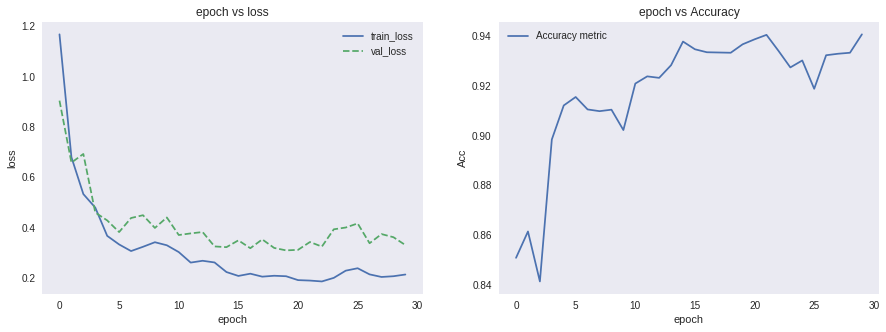

In [133]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()

반 정도 시간에 학습이 포화되는 걸 확인했으므로 learning rate를 반으로 줄여 보았습니다.
이제 확실히 학습하는 내내 효과가 있는 걸 볼 수 있습니다.
최종적으로는 약간 더 높은 정확도에 도달했습니다.
epoch 10에서 갑자기 도약을 하는 건 무슨 일이 일어난 것일까요?

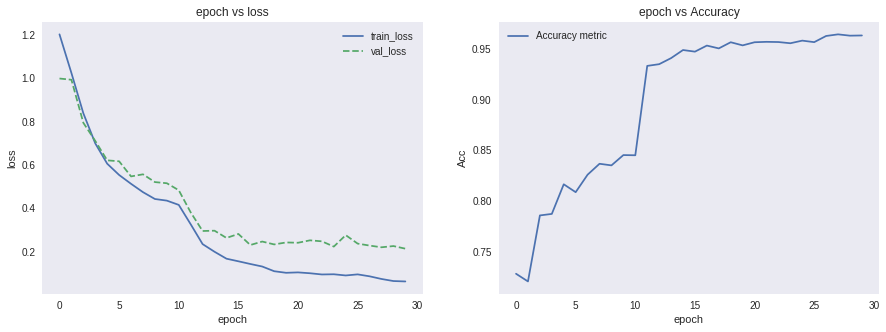

In [137]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()